In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/usa_county_wise.csv


In [2]:
# thanks to:
#https://www.kaggle.com/shawon10/covid-19-easy-data-analysis-for-beginners
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [15]:
#df=pd.read_csv('/kaggle/input/corona-virus-report/usa_county_wise.csv', na_filter=False)
df=pd.read_csv('/kaggle/input/corona-virus-report/usa_county_wise.csv', index_col='Date', parse_dates=True)
# df=df.drop(['UID'],axis=1)
#df=pd.read_csv('/kaggle/input/corona-virus-report/usa_county_wise.csv', parse_dates=True)
df.head(10)

UID iso2 iso3  code3    FIPS   Admin2  \
Date                                                     
2020-01-22        16   AS  ASM     16    60.0      NaN   
2020-01-22       316   GU  GUM    316    66.0      NaN   
2020-01-22       580   MP  MNP    580    69.0      NaN   
2020-01-22       630   PR  PRI    630    72.0      NaN   
2020-01-22       850   VI  VIR    850    78.0      NaN   
2020-01-22  84001001   US  USA    840  1001.0  Autauga   
2020-01-22  84001003   US  USA    840  1003.0  Baldwin   
2020-01-22  84001005   US  USA    840  1005.0  Barbour   
2020-01-22  84001007   US  USA    840  1007.0     Bibb   
2020-01-22  84001009   US  USA    840  1009.0   Blount   

                      Province_State Country_Region        Lat       Long_  \
Date                                                                         
2020-01-22            American Samoa             US -14.271000 -170.132000   
2020-01-22                      Guam             US  13.444300  144.793700   
2020-01-22  Northern Mariana Islands             US  15.097900  145.673900   
2020-01-22               Puerto Rico             US  18.220800  -66.590100   
2020-01-22            Virgin Islands             US  18.335800  -64.896300   
2020-01-22                   Alabama             US  32.539527  -86.644082   
2020-01-22                   Alabama             US  30.727750  -87.722071   
2020-01-22                   Alabama             US  31.868263  -85.387129   
2020-01-22                   Alabama             US  32.996421  -87.125115   
2020-01-22                   Alabama             US  33.982109  -86.567906   

                            Combined_Key  Confirmed  Deaths  
Date                                                         
2020-01-22            American Samoa, US          0       0  
2020-01-22                      Guam, US          0       0  
2020-01-22  Northern Mariana Islands, US          0       0  
2020-01-22               Puerto Rico, US          0       0  
2020-01-22            Virgin Islands, US          0       0  
2020-01-22          Autauga, Alabama, US          0       0  
2020-01-22          Baldwin, Alabama, US          0       0  
2020-01-22          Barbour, Alabama, US          0       0  
2020-01-22             Bibb, Alabama, US          0       0  
2020-01-22           Blount, Alabama, US          0       0

In [40]:
def plotCumulativeByDate(df, label, key):
    group = df.groupby('Date')[key].sum().reset_index()

    fig = px.line(group, x="Date", y=key, 
                  title=label + " " + key + " Cases Over Time")

    fig.show()

In [41]:
def plotDailyByDate(df, label, key):
    group = df.groupby('Date')[key].nunique().reset_index()
    #group.head(5)
    fig = px.line(group, x="Date", y=key, 
                  title=label + " " + key + " Cases Over Time")

    fig.show()

In [49]:
fig = px.line(df, x=df.index, y='Confirmed', 
              title='Confirmed' + " Cases Over Time")

fig.show()

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



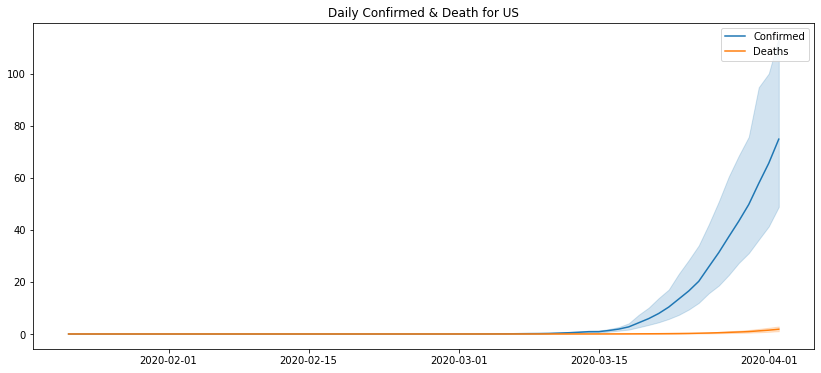

In [51]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("Daily Confirmed & Death for US")

# Line chart showing daily global streams of 'Shape of You'
#sns.lineplot(data=df['Confirmed'], label="Confirmed")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=df['Deaths'], label="Deaths")
plt.show()

# Add label for horizontal axis
#plt.xlabel("Date")


In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(12, 6))

# Add title
plt.title("US Deaths")

# Bar chart showing average
# sns.barplot(x=ign_data.index, y=ign_data['Racing'])
sns.barplot(x=df.index, y=df['Deaths'])

# Add label for vertical axis
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

In [48]:
group = df.groupby('Date')['Confirmed'].count().reset_index()
group.head(5)



Date  Confirmed
0 2020-01-22       3253
1 2020-01-23       3253
2 2020-01-24       3253
3 2020-01-25       3253
4 2020-01-26       3253

In [ ]:
fig = px.line(df, x="Date", y='Confirmed', 
                  title='Confirmed' + " Cases Over Time")

fig.show()

In [26]:
group = df.groupby('Date')['Confirmed'].sum().reset_index()
group.head(5)

Date  Confirmed
0 2020-01-22          1
1 2020-01-23          1
2 2020-01-24          2
3 2020-01-25          2
4 2020-01-26          5

KeyError: 'Date'

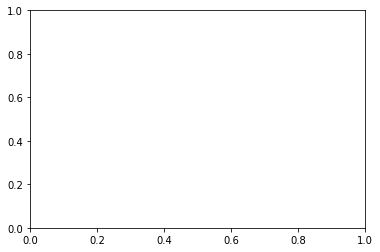

In [16]:

ax = plt.gca()

df.plot(kind='line',x='Date',y='Confirmed',ax=ax)
df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)

plt.show()

In [50]:
plotCumulativeByDate(df, "US Overall", "Confirmed")
 

In [45]:
plotDailyByDate(df, "US Overall", "Deaths")


In [ ]:
plotLineByDate(df, "US Overall", "Confirmed")
plotDailyByDate(df, "US Overall", "Confirmed")


In [ ]:
kansas_city_ks=df.loc[(df['Combined_Key'] == 'Wyandotte, Kansas, US') | 
                   (df['Combined_Key'] == 'Douglas, Kansas, US') | 
                   (df['Combined_Key'] == 'Johnson, Kansas, US')]
kansas_city_ks.tail(5)
plotLineByDate(kansas_city_ks, "Kansas City, Kansas", "Confirmed")

In [ ]:
# Montgomery, maryland
montgomery_md=df.loc[df['Combined_Key'] == 'Montgomery, Maryland, US']
montgomery_md.tail(5)
plotLineByDate(montgomery_md, "Montgomery, Maryland", "Confirmed")

In [ ]:
#columbus, ohio - Franklin Delaware Fairfield 
columbus_oh=df.loc[(df['Combined_Key'] == 'Franklin, Ohio, US') | 
                   (df['Combined_Key'] == 'Delaware, Ohio, US') | 
                   (df['Combined_Key'] == 'Fairfield, Ohio, US')]
columbus_oh.tail(5)
plotLineByDate(columbus_oh, "Columbus, Ohio", "Confirmed")

In [ ]:
#youngstown, ohio - Mahoning
youngstown_oh=df.loc[df['Admin2'] == 'Mahoning']
youngstown_oh.tail(5)
plotLineByDate(youngstown_oh, "Youngstown, Ohio", "Confirmed")

In [ ]:
# Pittsburg - Allegheny
pittsburg_pa=df.loc[df['Admin2'] == 'Allegheny']
pittsburg_pa.tail(5)
plotLineByDate(pittsburg_pa, "Pittsburg, PA", "Confirmed")

In [ ]:
# Haymarket - Prince William
haymarket_va=df.loc[df['Admin2'] == 'Prince William']
haymarket_va.tail(5)
plotLineByDate(haymarket_va, "Prince William County, VA", "Confirmed")

In [ ]:
#Virginia Beach, Virginia
virginia_beach_va=df.loc[(df['Combined_Key'] == 'Virginia Beach, Virginia, US') | 
                         (df['Combined_Key'] == 'Chesapeake, Virginia, US') | 
                         (df['Combined_Key'] == 'Norfolk, Virginia, US')]
virginia_beach_va.tail(5)
plotLineByDate(virginia_beach_va, "Virginia Beach, Norfolk, Chesapeake, VA", "Confirmed")

In [ ]:
#king, WA
seatle_wa=df.loc[(df['Combined_Key'] == 'King, Washington, US') | 
                    (df['Combined_Key'] == 'Snohomish, Washington, US')]
#seatle_wa.head(5) # 1/22/20
seatle_wa.tail(5) # 4/1/20
plotLineByDate(seatle_wa, "King County, WA", "Confirmed")

In [ ]:
#Snohomish, WA
snohomish_wa=df.loc[(df['Combined_Key'] == 'Snohomish, Washington, US')]
snohomish_wa.tail(5)
plotLineByDate(snohomish_wa, "Snohomish, WA", "Confirmed")
plotLineByDate(snohomish_wa, "Snohomish, WA", "Deaths")

In [ ]:
def plotKeysByDate(df, label, key1, key2):
    group = df.groupby('Date')[key1].sum().reset_index()

    fig = px.line(group, x="Date", y=key1, 
                  title=label + " " + key1 + " Cases Over Time")

    fig.show()

In [ ]:
plotKeysByDate(snohomish_wa, "Snohomish, WA", "Confirmed", "Deaths")

In [ ]:
group = kansas_city_ks.groupby('Date')['Confirmed'].sum().reset_index()

fig = px.line(group, x="Date", y="Confirmed", 
              title="Kansas City Confirmed Cases Over Time")

fig.show()

In [ ]:
#kansas_city_ks.sort_values(by=['Date'],ascending=True).plot(x='Date',y='Confirmed',fontsize=15,figsize=(12,18), kind='barh');